<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-of-D*-Lite-algorithm" data-toc-modified-id="Example-of-D*-Lite-algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example of D* Lite algorithm</a></span><ul class="toc-item"><li><span><a href="#Grid-definition" data-toc-modified-id="Grid-definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Grid definition</a></span></li></ul></li></ul></div>

# Example of D* Lite algorithm

## Grid definition

In [16]:
from grid import Grid
from d_star_lite import DStarLiteRunner
from node import Node
import utils
from visialization_utils import get_image

%matplotlib inline

In [2]:
mapstr = """
. . . # # . . . . . . . . # # . . . # . . # # . . . . . . .
. . . # # # # # . . # . . # # . . . . . . # # . . . . . . .
. . . . . . . # . . # . . # # . . . # . . # # . . . . . . .
. . . # # . . # . . # . . # # . . . # . . # # . . . . . . .
. . . # # . . # . . # . . # # . . . # . . # # . . . . . . .
. . . # # . . # . . # . . # # . . . # . . # # # # # . . . .
. . . # # . . # . . # . . # # . . . # . . # # # # # . . . .
. . . . . . . # . . # . . # # . . . # . . # . . . . . . . .
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . .
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . .
. . . # # . . . . . # . . . . . . . # . . . . . . . . . . .
. . . # # # # # # # # # # # # # . # # . # # # # # # # . # #
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
"""

In [3]:
grid_example = Grid(height=15, width=30)

In [4]:
grid_example.read_from_string(mapstr)

In [7]:
runner = DStarLiteRunner(grid_example, (1, 1), (12, 25), observe_range=2)

In [10]:
from node import Node

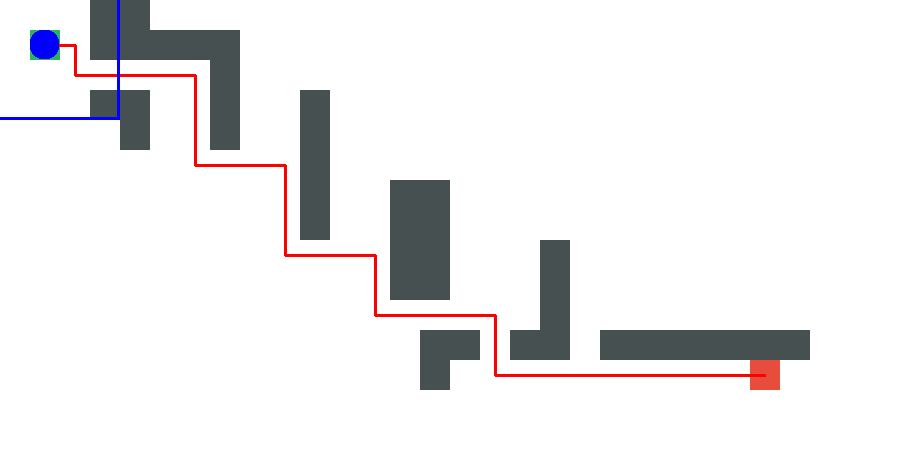

In [135]:
Draw(grid_example, start_node=Node((1, 1)), goal_node=Node((12, 25)), traveled_path=[(1, 1)], planned_path=future_path)

In [133]:
future_path = runner.get_path_to_goal(result[0])

In [11]:
traveled_path = []
images = []

for node, planned_path in runner.find_path():
    traveled_path.append(node.position)
    images.append(Draw(grid_example, 
                       start_node=Node((1, 1)), 
                       goal_node=Node((12, 25)), 
                       traveled_path=traveled_path, 
                       planned_path=planned_path))

No changes by moving to {} (2, 6)
No changes by moving to {} (3, 6)
No changes by moving to {} (4, 6)
No changes by moving to {} (5, 6)
No changes by moving to {} (5, 7)
No changes by moving to {} (5, 9)
No changes by moving to {} (6, 9)
No changes by moving to {} (7, 9)
No changes by moving to {} (8, 9)
No changes by moving to {} (8, 10)
No changes by moving to {} (10, 14)
No changes by moving to {} (11, 16)
No changes by moving to {} (12, 16)
No changes by moving to {} (12, 17)
No changes by moving to {} (12, 25)


In [122]:
len(images)

36

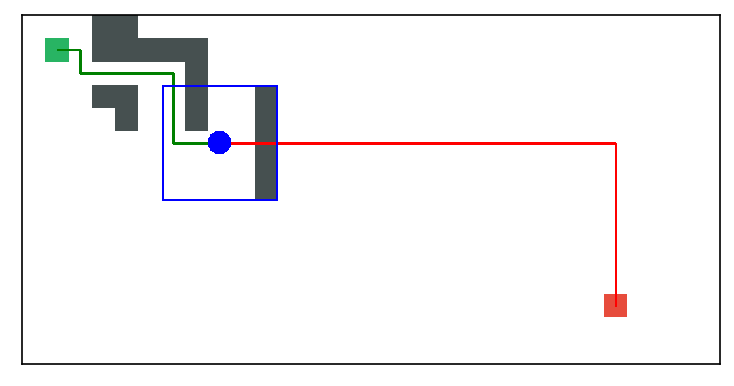

In [14]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(np.asarray(images[11]))

In [15]:
images[0].save('example.gif', 
               save_all=True, 
               append_images=images[1:], 
               optimize=False, 
               duration=200, 
               loop=0)

In [126]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
from sys import float_info
EPS = float_info.epsilon
%matplotlib inline

def Draw(grid_map, start=None, goal=None, path=None, actual=True):
    '''
    Visualize current environment observed by the agent.
    '''
    k = 30
    hIm = grid_map.height * k
    wIm = grid_map.width * k
    im = Image.new('RGB', (wIm, hIm), color = 'white')
    draw = ImageDraw.Draw(im)

    for i in range(grid_map.height):
        for j in range(grid_map.width):
            if actual and (grid_map.is_wall_cell_actual[i][j] == 1):
                draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=(70, 80, 80))
            if not actual and (grid_map.is_wall_cell_observed[i][j] == 1):
                draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=(70, 80, 80))

    if (start is not None) and (grid_map.is_traversable(start.row, start.column)):
        draw.rectangle((start.column * k, 
                        start.row * k, 
                        (start.column + 1) * k - 1, 
                        (start.row + 1) * k - 1), 
                       fill=(40, 180, 99), width=0)

    if (goal is not None) and (grid_map.is_traversable(goal.row, goal.column)):
        draw.rectangle((goal.column * k, 
                        goal.row * k, 
                        (goal.column + 1) * k - 1, 
                        (goal.row + 1) * k - 1), 
                       fill=(231, 76, 60), width=0)

    fig, ax = plt.subplots(dpi=150)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(np.asarray(im))